In [1]:
import os
import sys
import pathlib
import numpy as np
import tensorflow as tf
from typing import Tuple
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn
from bfcnn.visualize import collage
from bfcnn.utilities import load_image
from bfcnn.dataset import random_crops

In [2]:
# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# base directory for test images
IMAGES_TEST_DIR = \
    pathlib.Path(os.path.abspath("")).parent.resolve() / "images" / "test"

# directory of kitti test images
KITTI_DIR = \
    IMAGES_TEST_DIR / "kitti"

# all the kitti test images
KITTI_IMAGES = \
    [img for img in (KITTI_DIR / "files").glob("*.png")]

KITTI_IMAGES_BATCH = KITTI_IMAGES[0:10]

img_batch = []
for img_path in KITTI_IMAGES_BATCH:
    # create input for pyramids
    img = load_image(
            path=img_path,
            color_mode="rgb",
            normalize=True,
            target_size=(256, 256))
    img = img + 0.5
    img_batch.append(img)
img_batch = tf.concat(img_batch, axis=0)
print(img_batch.shape)

(10, 256, 256, 3)


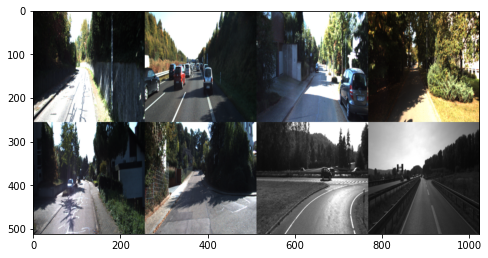

In [4]:
img_collage = collage(img_batch)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
axes.imshow(img_collage)
plt.show()

(40, 64, 64, 3)


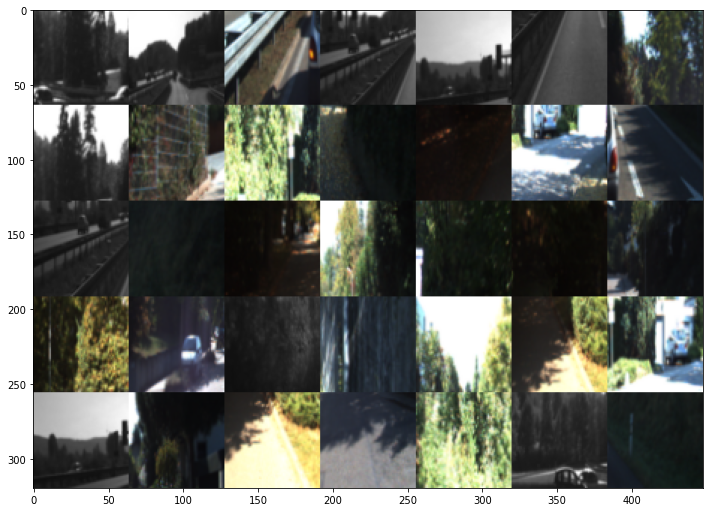

In [5]:
crops = \
    random_crops(
        img_batch,
        no_crops_per_image=4,
        crop_size=(64, 64),
        cast_to_uint8=False)
print(crops.shape)

batch_collage = collage(crops)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
axes.imshow(batch_collage)
plt.show()